In [1]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt
from scipy.sparse import *
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from matplotlib import cm

def scatter_plot_bigram(edges):
    m = edge_to_matrix(edges)
    scatter_plot_metrix(m)

def edge_to_matrix(edges):
    if(len(edges) ==0):
        return 0;
    node_first = []
    node_second = []
    for edge in edges:
        node_first.append(int(edge[0]))
        node_second.append(int(edge[1]))
    largest_index = max(node_first)
    if largest_index <= min(node_second):
        node_second = [ x -largest_index for x in node_second]
    largest_index = max([max(node_first), max(node_second)])
    return coo_matrix((np.ones(len(edges)), (node_first, node_second)), shape=(largest_index+1, largest_index+1))
    
def scatter_plot_metrix(metrix_edge, pt="ns"):
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = [30, 30]
    
    if pt != "ns":
        edges = list(np.where(metrix_edge != 0))
        fig, ax = plt.subplots()
        ax.scatter(edges[0], edges[1], c='tab:orange')

        ax.grid(True)
        plt.axis('on')
        plt.xlabel("User")
        plt.ylabel("Item")
        plt.show()
    else:
        plt.spy(metrix_edge, marker=',', markersize = 1)
        plt.show()

In [2]:
raw_data=[]
with open("example.txt", encoding='utf-8') as file:
    for line in file:
        raw_data.append(line)

graph_data=dict()
nodes_first = set()
nodes_second = set()
edge=set()
edgeDict=dict()
for line in raw_data:
    l = line.split(' ')[0:2]
    nodes_first.add(int(l[0]))
    nodes_second.add(int(l[1]))
largest_nodes_first =  max(nodes_first)

for line in raw_data:
    if(largest_nodes_first < min(nodes_second)):
        edge.add((int(line.split(' ')[0]), int(line.split(' ')[1])))
    else:
        edge.add((int(line.split(' ')[0]), int(line.split(' ')[1]) + largest_nodes_first))
nodes_second = [x + largest_nodes_first for x in list(nodes_second)]
nodes = list(nodes_first) + nodes_second
edge = list(edge)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge)

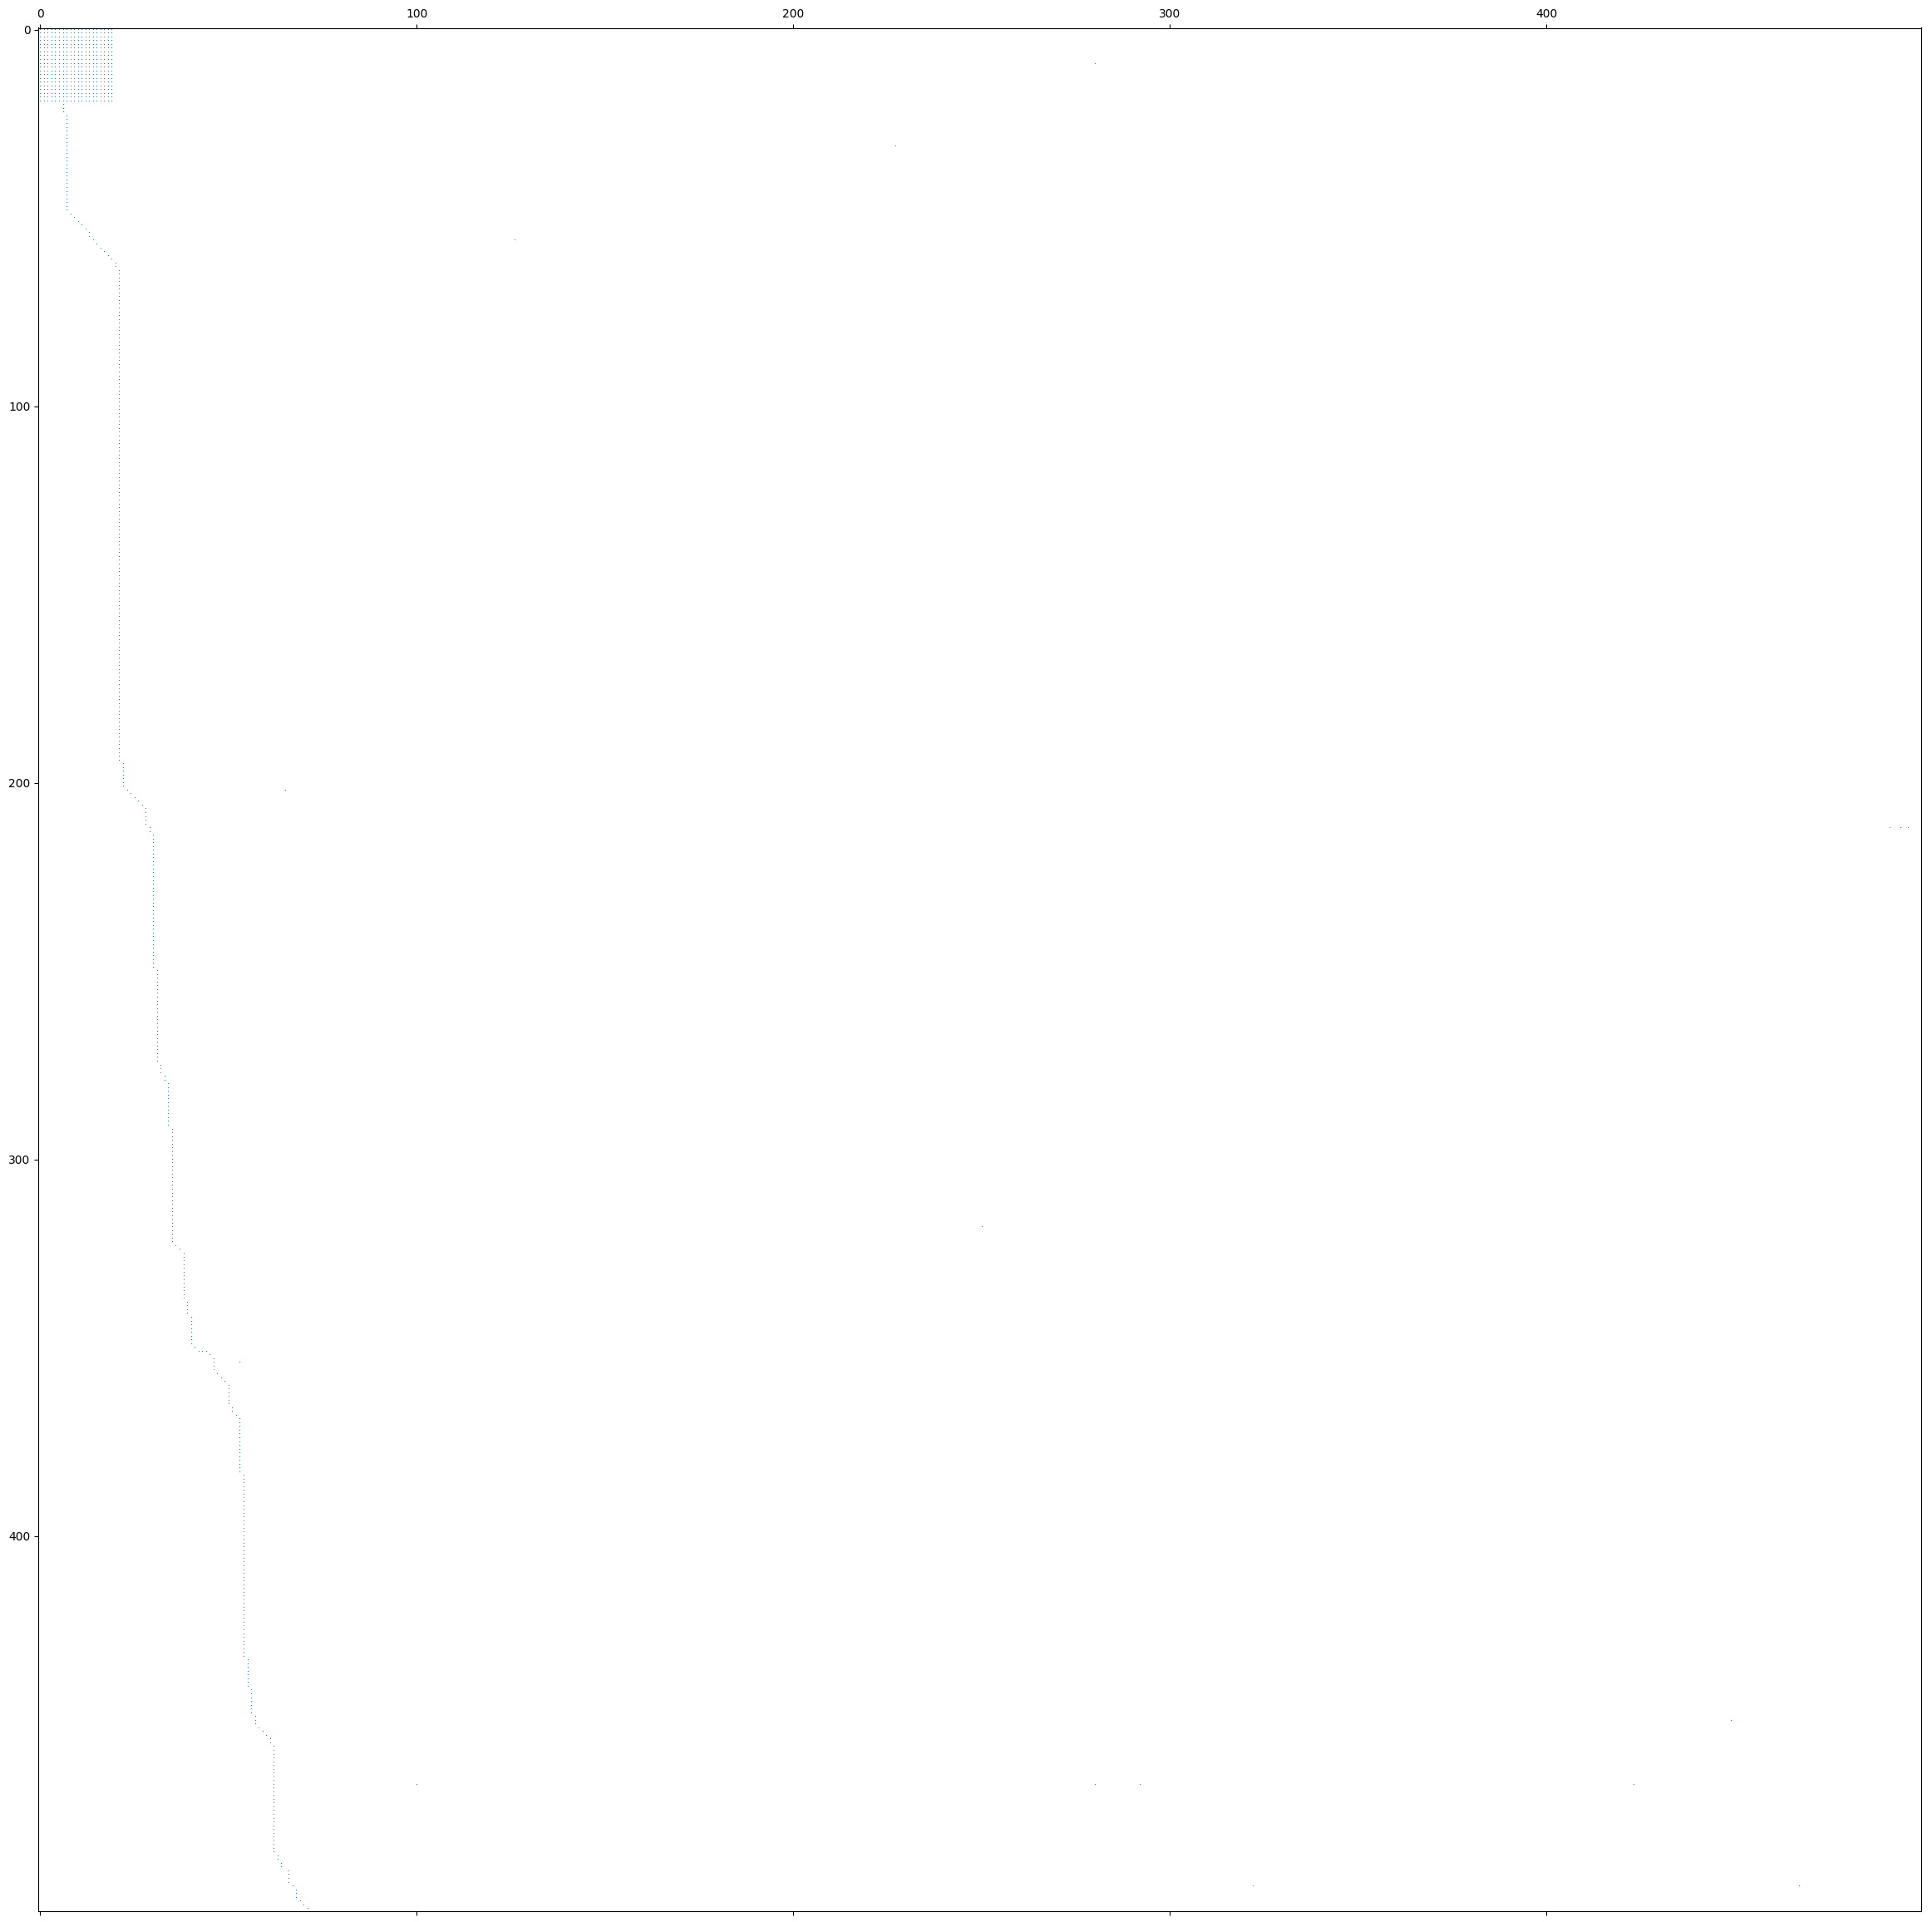

In [3]:
# vis of matrix
scatter_plot_bigram(G.edges())

In [4]:
#0-499, 500-999, farudar 450-499, 500 -549
import numpy as np
x_start =450
x_end = 500
x_num = 20
y_start = 500
y_end = 549
y_num = 30
random_cam_num = 30
honest_num = 10
edges = []
nodes = list(range(1000))
def pattern1():
    for x in list(np.random.uniform(x_start, x_end, x_num)):
        edges += [(int(x), int(y)) for y in list(np.random.uniform(y_start, y_end, y_num))]
    for x in list(np.random.uniform(0, x_start, random_cam_num)):
        edges += [(int(x), int(y)) for y in list(np.random.uniform(y_start, y_end, random_cam_num))]
    for x in list(np.random.uniform(x_start, x_end, honest_num)):
        edges += [(int(x), int(y)) for y in list(np.random.uniform(y_end, 999, honest_num))]

def pattern2():
    for x in list(np.random.rand(x_num * x_num, 2) * (x_end - x_start)):
        edges.append((int(x[0]) + x_start, int(x[1]) + y_start))
    
    for x in list(np.random.rand(x_num * x_num, 2)):
        a = int(x[0] * x_start)
        b = int(x[1] * (y_end- y_start)) + y_start;
        edges.append((a,b))
    
    for x in list(np.random.rand(honest_num * honest_num, 2)):
        a = int(x[0] * (x_end - x_start)) + x_start
        b = int(x[1] * (1000 - y_end)) + y_end;
        edges.append((a,b))
    
    mu,sigma = 20, 1
    al = []
    bl = []
    for x in list(np.random.lognormal(mu, sigma, [50*50, 2])):
        a = int(x[0])
        b = int(x[1])
        al.append(a)
        bl.append(b)
    al = [int(x/max(al) * 450) for x in al]
    bl = [1000 - int(x/max(bl) * 450) for x in bl]
    for e in zip(al, bl):
        edges.append(e)
pattern2()

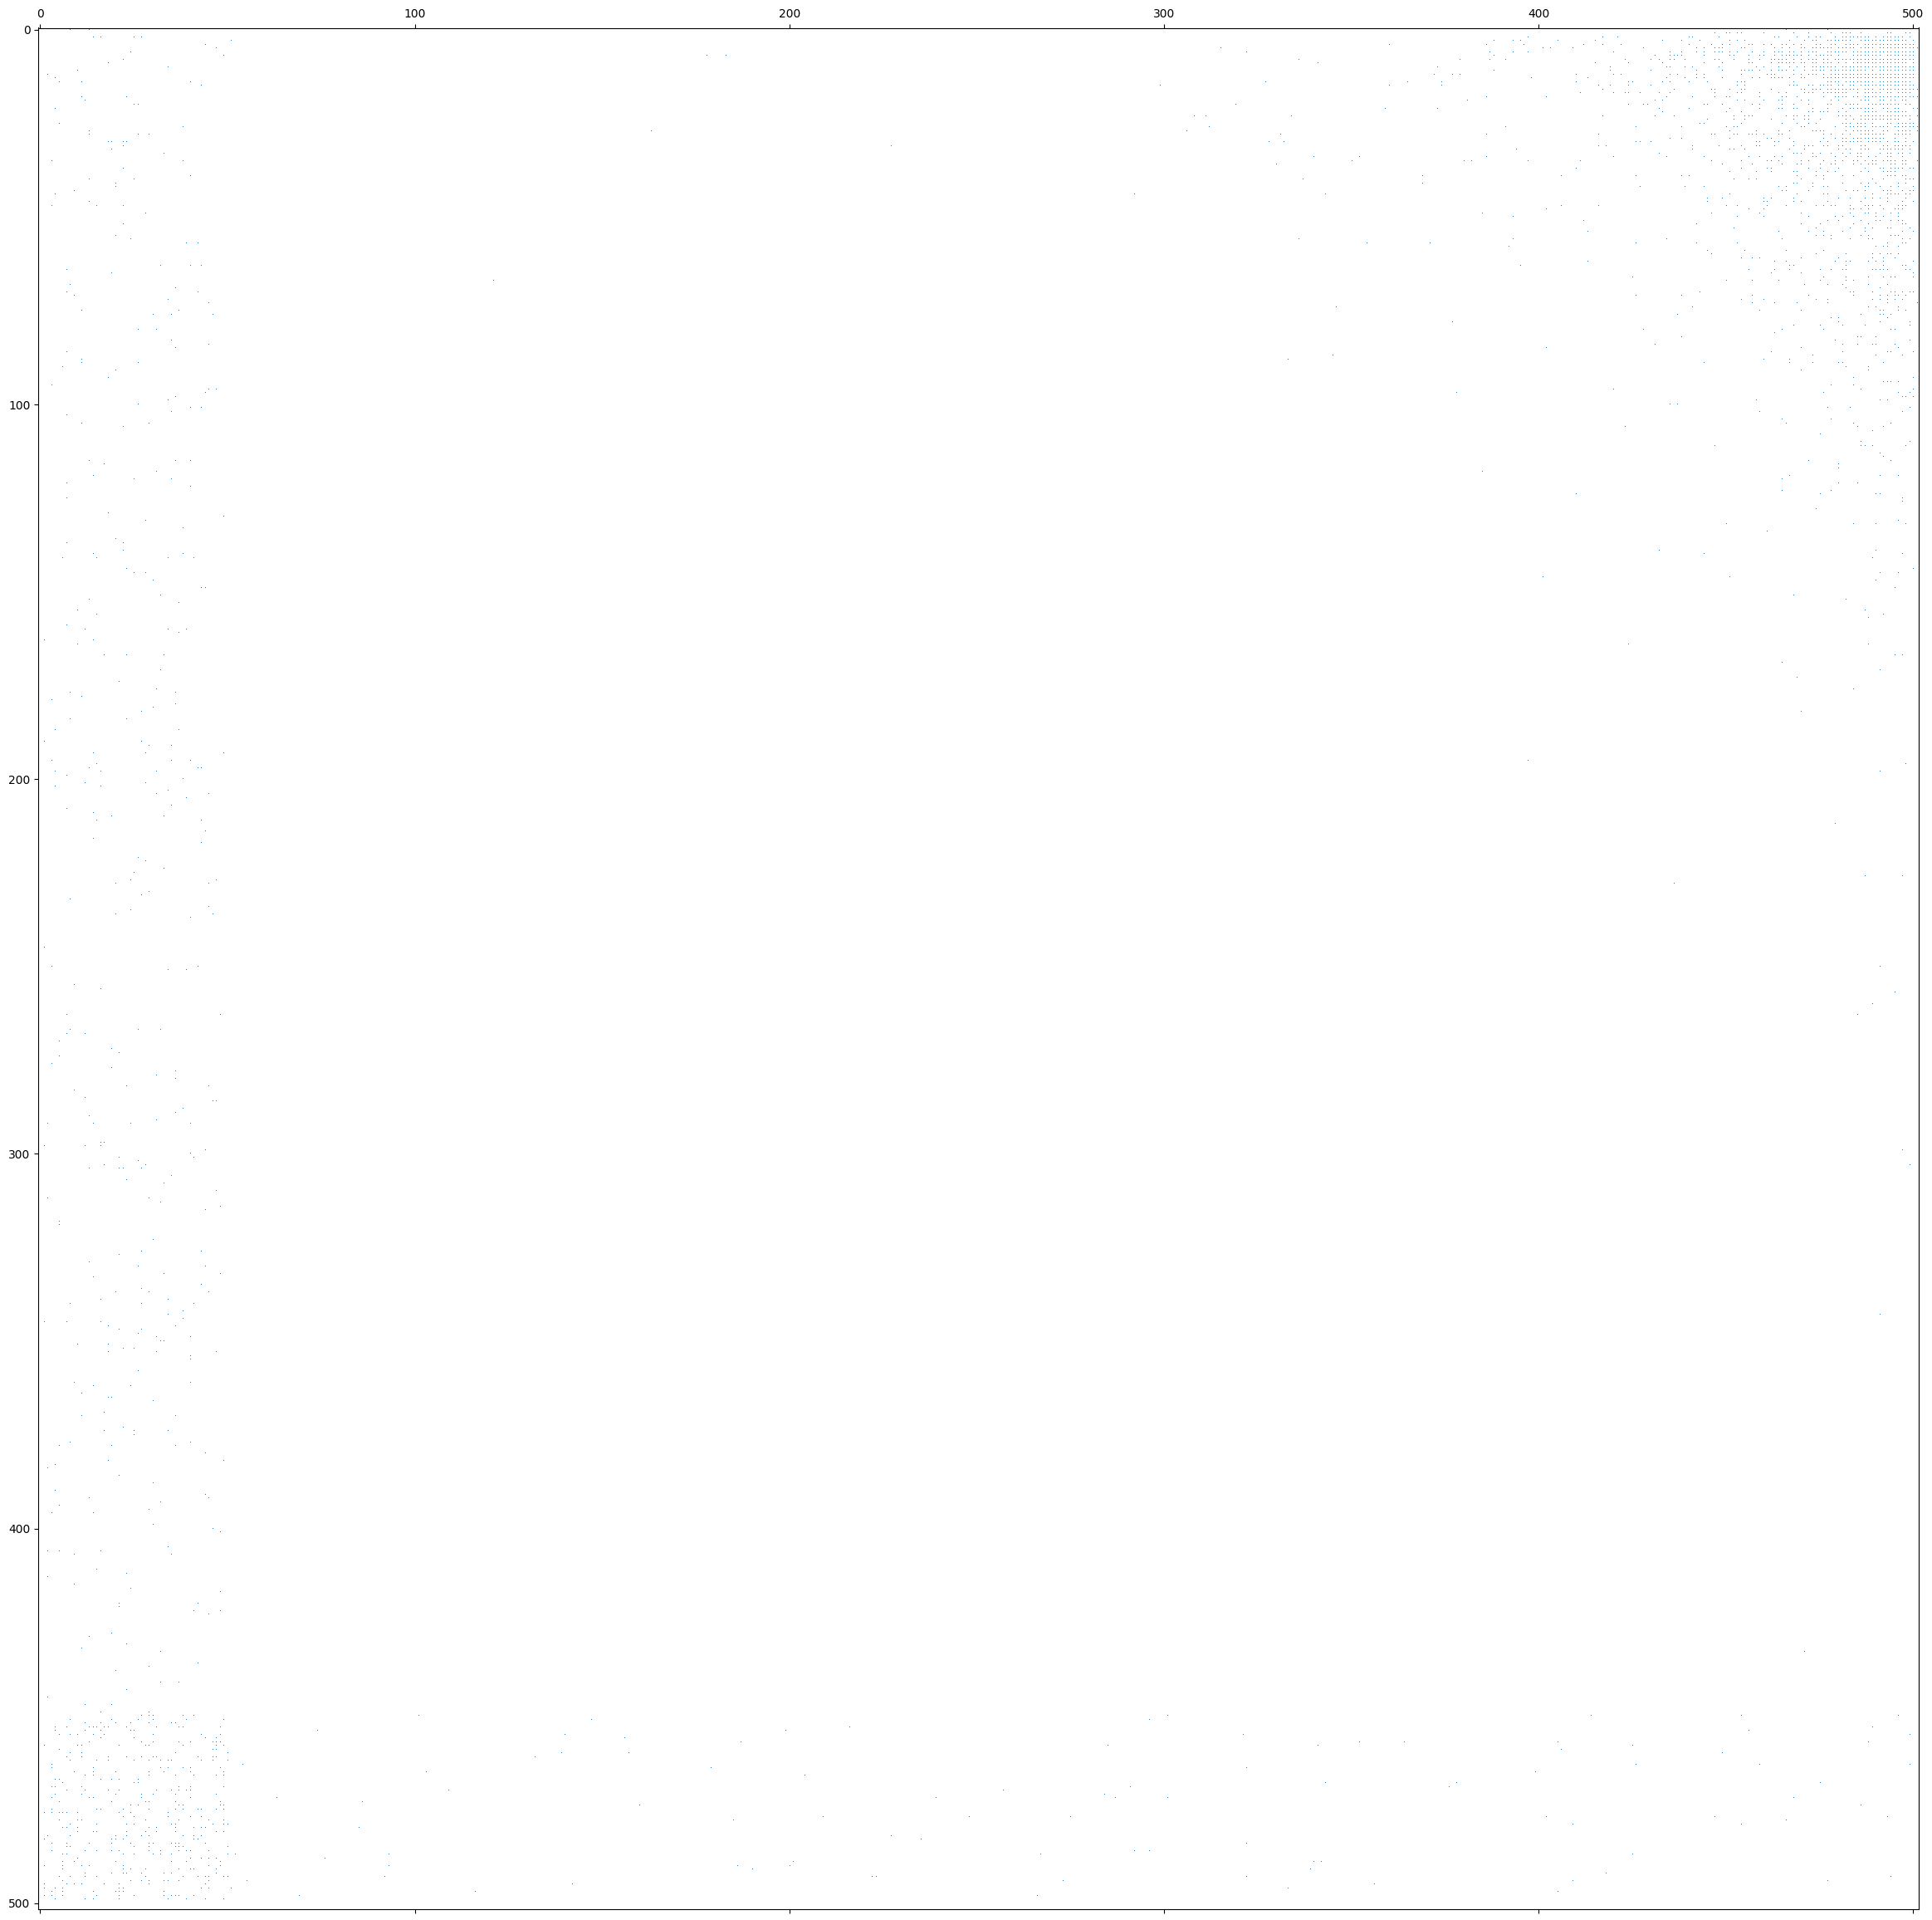

In [5]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
# vis of matrix
scatter_plot_bigram(G.edges())

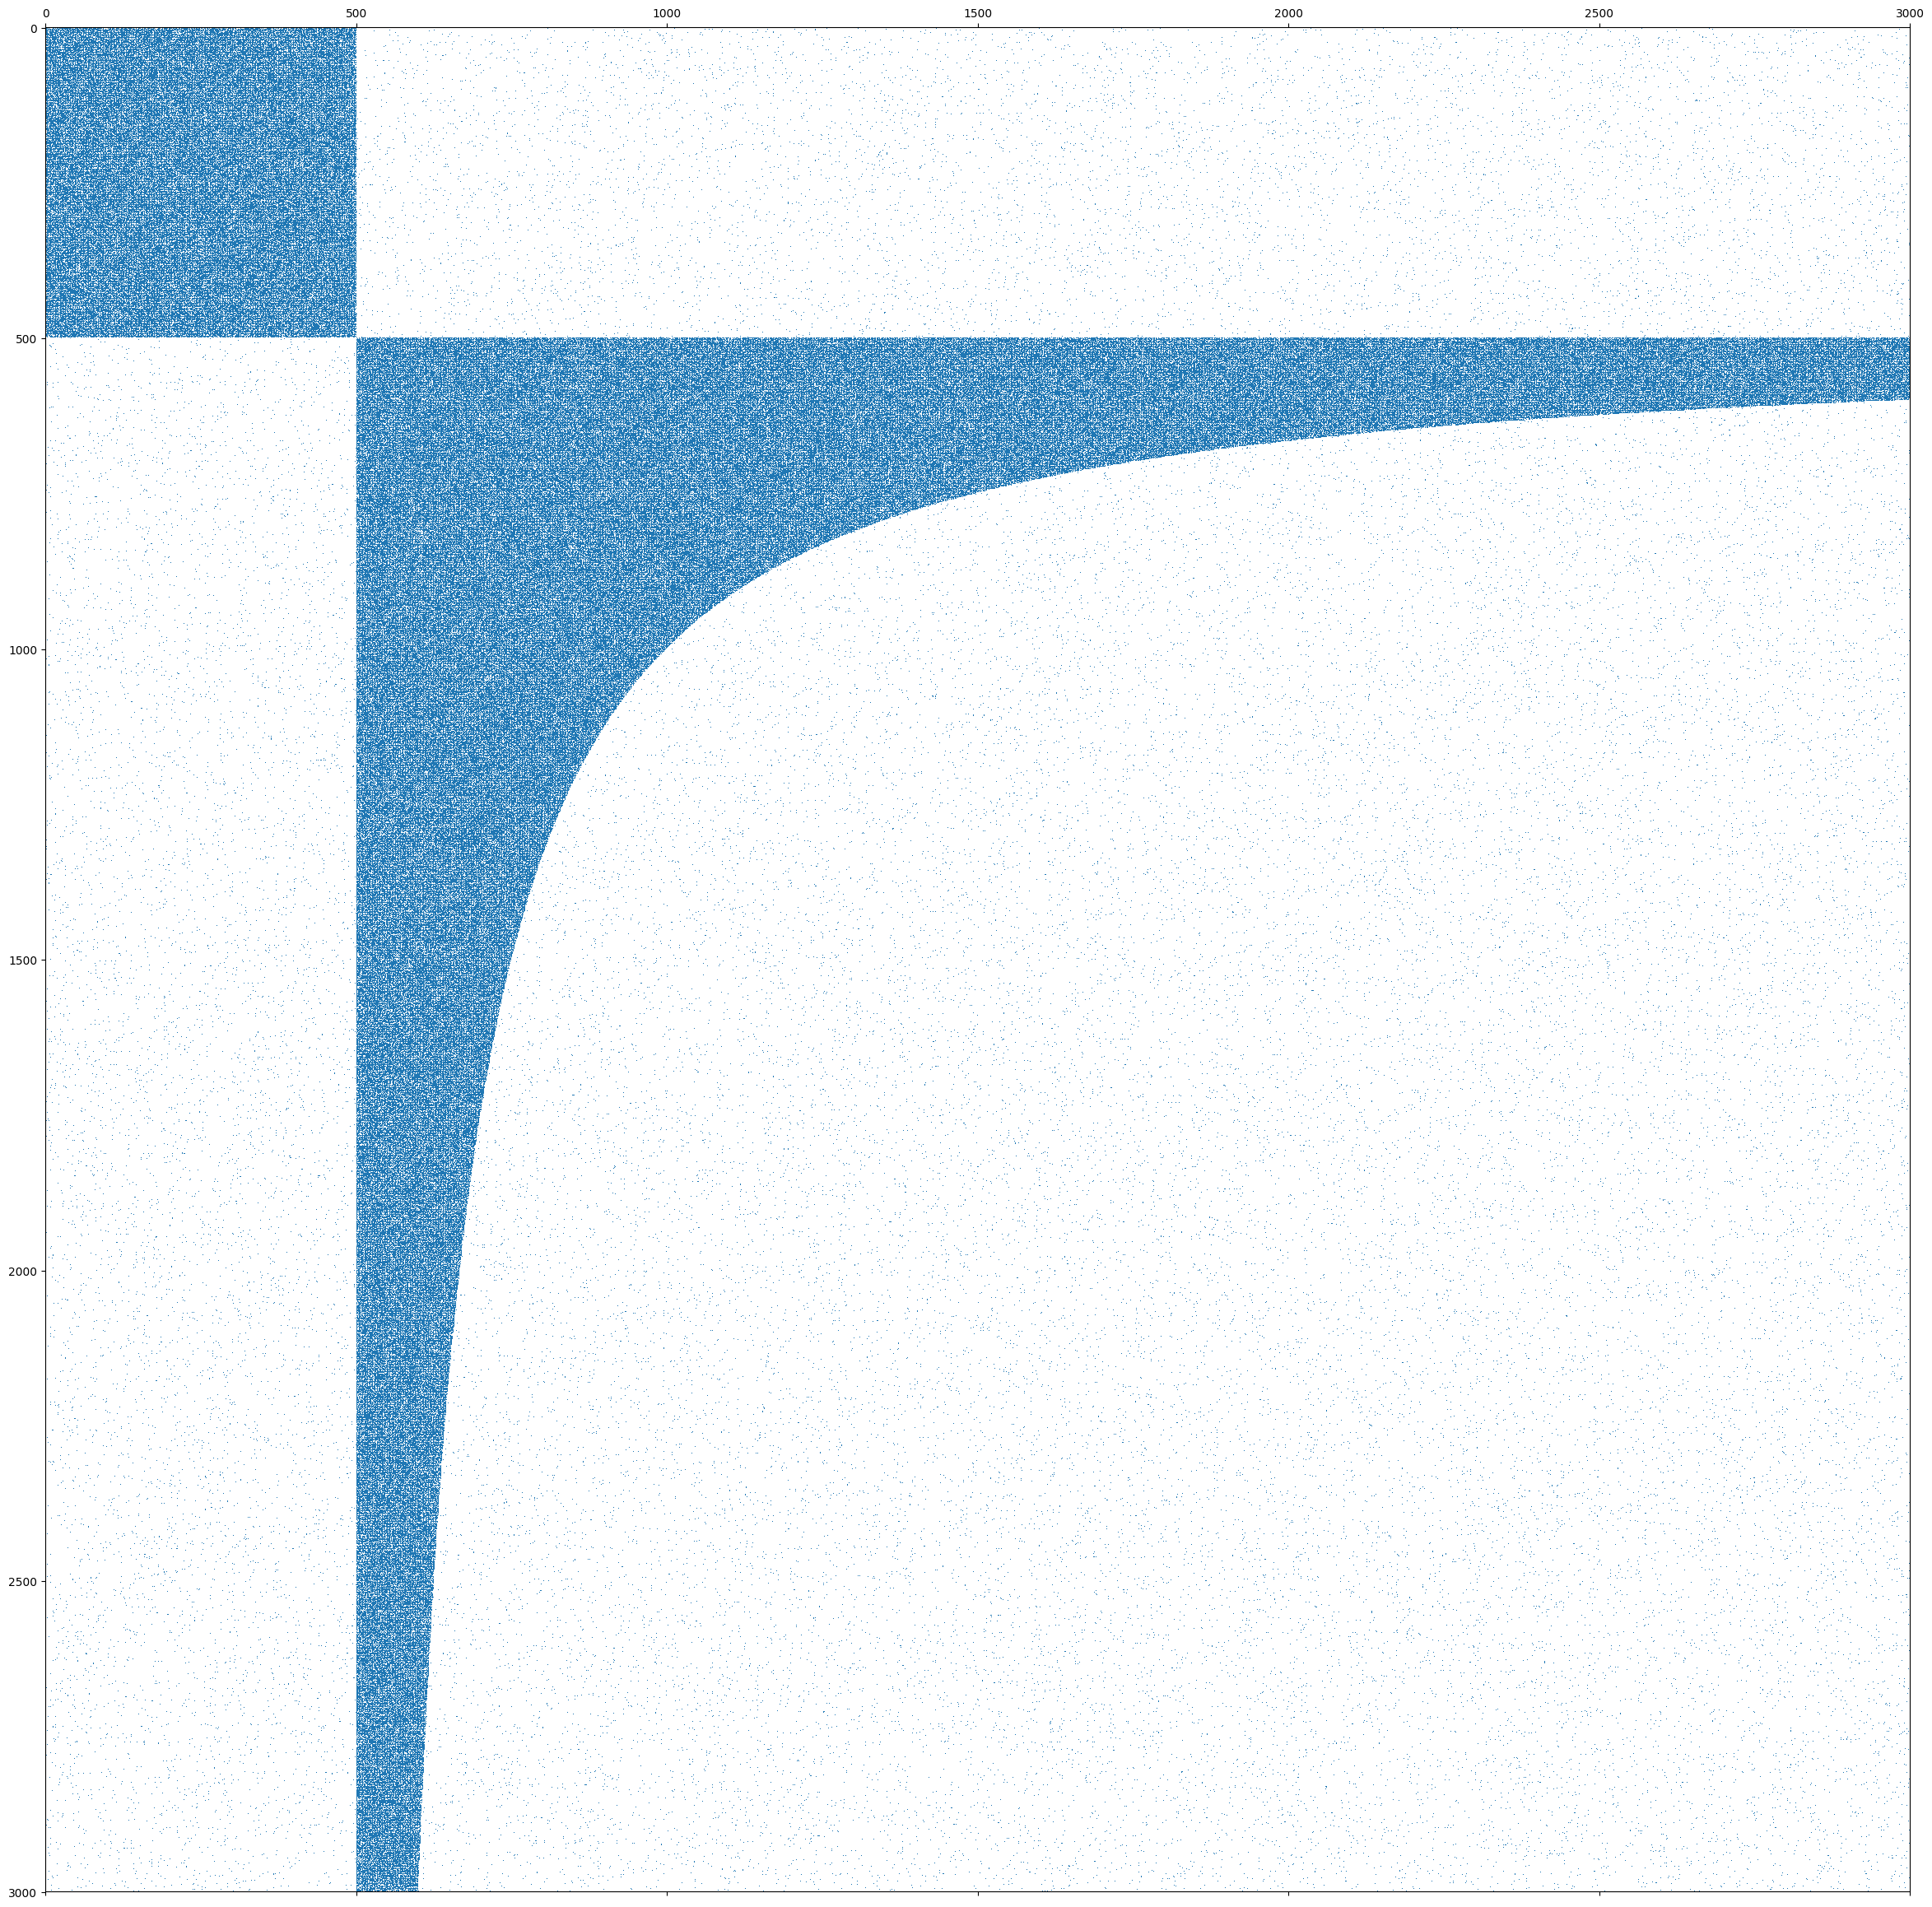

NameError: name 'acnt' is not defined

In [7]:
from scipy.sparse import coo_matrix
import random
import sys
import numpy as np
import random
import numpy.random as nr
import scipy.linalg as sla
from scipy.sparse import coo_matrix

def genEvenDenseBlock(A, B, p):
    m = []
    for i in range(A):
        a = np.random.binomial(1, p, B)
        m.append(a)
    
    return np.array(m)
    

def genHyperbolaDenseBlock(A, B, alpha, tau):
    'this is from hyperbolic paper: i^\alpha * j^\alpha > \tau'
    m = np.empty([A, B], dtype=int)
    for i in range(A):
        for j in range(B):
            if (i+1)**alpha * (j+1)**alpha > tau:
                m[i,j] = 1
            else:
                m[i,j] = 0
    return m

def genDiHyperRectBlocks(A1, B1, A2, B2, alpha=-0.5, tau=None, p=1):
    if tau is None:
        tau = A1**alpha * B1**alpha
    m1 = genEvenDenseBlock(A1, B1, p=p)
    m2 = genHyperbolaDenseBlock(A2, B2, alpha, tau)
    M = sla.block_diag(m1, m2)
    return M

def addnosie(M, A, B, p, black=True, A0=0, B0=0):
    v = 1 if black else 0
    for i in range(A-A0):
        a = np.random.binomial(1, p, B-B0)
        for j in a.nonzero()[0]:
            M[A0+i,B0+j]=v
    return M

def add_uniform_noise(M, p):
    for i in range(len(M)):
        for j in range(len(M[0])):
            if random.random() < p:
                M[i][j] = 1
    return M
def injectCliqueCamo(M, m0, n0, p, testIdx):
    (m,n) = M.shape
    M2 = M.copy().tolil()

    colSum = np.squeeze(M2.sum(axis = 0).A)
    colSumPart = colSum[n0:n]
    colSumPartPro = np.int_(colSumPart)
    colIdx = np.arange(n0, n, 1)
    population = np.repeat(colIdx, colSumPartPro, axis = 0)
    for i in range(m0):
        # inject clique
        for j in range(n0):
            if random.random() < p:
                M2[i,j] = 1
        # inject camo
        if testIdx == 1:
            thres = p * n0 / (n - n0)
            for j in range(n0, n):
                if random.random() < thres:
                    M2[i,j] = 1
        if testIdx == 2:
            thres = 2 * p * n0 / (n - n0)
            for j in range(n0, n):
                if random.random() < thres:
                    M2[i,j] = 1
        # biased camo           
        if testIdx == 3:
            colRplmt = random.sample(list(population), int(n0 * p))
            M2[i,colRplmt] = 1

    return M2.tocsc()

A1,B1,A2,B2= 500,500, 2500, 2500
m = genDiHyperRectBlocks(A1, B1, A2, B2, alpha=-0.5, tau=0.002)
m = addnosie(m, A1+A2, B1+B2, 0.01, black=True, A0=0, B0=0)
m = addnosie(m, A1+A2, B1+B2, 0.4, black=False, A0=0, B0=0)
sm = coo_matrix(m)
cnt, bcnt = 500, 500
scatter_plot_metrix(m)
M2 = injectCliqueCamo(sm, acnt, bcnt, p=0.6, testIdx=3).toarray()
scatter_plot_metrix(M2)